In [ ]:
"""
    Import necessary packages in python 
"""
%matplotlib inline
import os
import sys 
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split
import seaborn
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
"""
OS Paths for loading dataset and assets
"""
cwd = os.getcwd()

DATA_PATH = os.path.join(cwd, "data")
UTILS_PATH = os.path.join(cwd, "utils")

## Add the utils path 
sys.path.append(UTILS_PATH)

#Use the utils path to load our data loader methods 
from utils import data_loader

hmnist_metadata = data_loader.load_HAM10000_metadata(DATA_PATH)
# Quick test:
# for f in os.listdir(DATA_PATH):
#     print(os.path.join(DATA_PATH, f))

#Import data 
# import 
# metadata = pd.read_csv(os.path.join(DATA_PATH, "HAM10000_metadata.csv"))
# hmnist8_8_L = data_loader.load_HAM10000_L(DATA_PATH)

hmnist_28_28_RGB = data_loader.load_HAM10000_RGB(DATA_PATH, False)

Found HAM10000 metadata file, loading into pandas df
Done
Found HAM10000 RGB images in size 28x28, reading into df
Done


In [ ]:
hmnist_28_28_RGB.shape

(10015, 2353)

Size: (10015, 7)
Duplicates: 0
Nulls: 
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

Nans: (57, 7)


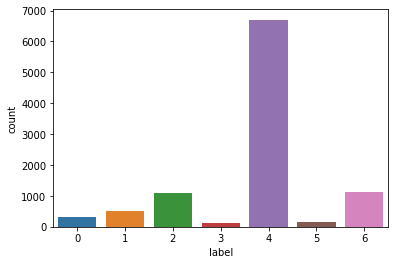

In [ ]:
#EDA portion: 
def eda(dataframe):
    size = dataframe.shape
    duplicates = dataframe.duplicated().sum()
    nulls = dataframe.isnull().sum()
    nans = dataframe.isnull().any(axis=1)
    rows_with_nans = dataframe[nans]

    return print(f"Size: {size}\nDuplicates: {duplicates}\nNulls: \n{nulls}\n\nNans: {rows_with_nans.shape}")
    

eda(hmnist_metadata)


labels = hmnist_28_28_RGB["label"]
plt.figure.Figure()
seaborn.countplot(x=labels)

In [ ]:
# resize the feature array
hmnist_28_28_RGB_feats = hmnist_28_28_RGB.drop(columns=["label"])
hmnist_reshape = np.array(hmnist_28_28_RGB_feats).reshape(-1, 28, 28, 3)

In [ ]:
print(f"Reshaped Feature Set Shape: {hmnist_reshape.shape}")
print(f"Label Set Shape: {labels.shape}")

Reshaped Feature Set Shape: (10015, 28, 28, 3)
Label Set Shape: (10015,)


In [ ]:
#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(hmnist_reshape, labels, train_size=0.8)#

In [ ]:
# Create an encoding of the labels into one-hot array

y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

In [ ]:
print(f"Shapes: \n \tX_train: {X_train.shape}\n\ty_train: {y_train.shape}\n\tX_test: {X_test.shape}\n\ty_test: {y_test.shape}")

Shapes: 
 	X_train: (8012, 28, 28, 3)
	y_train: (8012, 7)
	X_test: (2003, 28, 28, 3)
	y_test: (2003, 7)


In [ ]:
# Split the training set into a training and validation set.  The (X_test, y_test) will be used for predictions/confusion matrix 

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size=0.9) #also 0.8? for more validation loss behavior 

print(f"----- Training Set Sizes -----")
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\n")
print(f"----- Validation Set Sizes -----")
print(f"X_validate: {X_validate.shape}\ny_validate: {y_validate.shape}\n")
print(f"----- Test/Prediction Set Sizes -----")
print(f"X_test: {X_test.shape}\ny_test: {y_test.shape}")

----- Training Set Sizes -----
X_train: (7210, 28, 28, 3)
y_train: (7210, 7)

----- Validation Set Sizes -----
X_validate: (802, 28, 28, 3)
y_validate: (802, 7)

----- Test/Prediction Set Sizes -----
X_test: (2003, 28, 28, 3)
y_test: (2003, 7)


----- Displaying Sample Images from Train Set ------
Location: (0, 0): [0. 0. 0. 0. 1. 0. 0.]
Location: (0, 1): [0. 0. 0. 0. 1. 0. 0.]
Location: (1, 0): [0. 0. 0. 0. 0. 0. 1.]
Location: (1, 1): [0. 0. 0. 0. 1. 0. 0.]



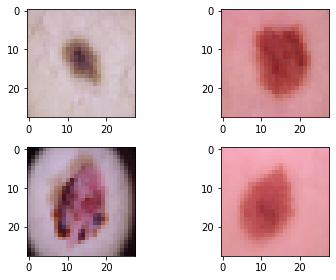

In [ ]:
# Show Sample Images from Training Set 
figure, axes = plt.pyplot.subplots(2, 2)
train_set_size = X_train.shape[0]
tumor_types = ""
for i in range(2):
  for j in range(2):
    k = np.random.choice(np.arange(train_set_size))
    axes[i, j].imshow(X_train[k])
    tumor_types += f"Location: ({i}, {j}): {y_train[k]}\n"
print("----- Displaying Sample Images from Train Set ------")
plt.pyplot.tight_layout()
print(tumor_types)

In [ ]:
### Create the NN Model 

#Fixed things
CONV_WINDOW = (3,3)

from create_models import test_model_1


# model = tf.keras.Sequential(layers=
#   [
#     Input(shape=[28, 28, 3]),
    
#     Conv2D(32, kernel_size=CONV_WINDOW, strides=(2,2), padding='same', activation='relu'),
#     Conv2D(32, kernel_size=CONV_WINDOW, padding='same', activation='relu'),
#     MaxPooling2D(),
#     BatchNormalization(),
#     Dropout(0.25),
   
#     Conv2D(64, kernel_size=CONV_WINDOW, padding='same', activation='relu'),
#     Conv2D(64, kernel_size=CONV_WINDOW, padding='same', activation='relu'),
#     MaxPooling2D(),
#     BatchNormalization(),
#     Dropout(0.4),
   
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dropout(0.5),
#     Dense(7, activation='softmax')
#   ]
# )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 32)         128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [ ]:
from keras import backend as K
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def prec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    p = prec(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2*((p*r)/(p+r+K.epsilon()))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1])

In [ ]:
#Callbacks used to stop learning early
learning_rate_reduction = ReduceLROnPlateau(monitor='val_f1', 
                                            patience=10, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_f1', mode='max', verbose=1, patience=10)

In [ ]:
#Image data generator, used to create a wider variety of images from the train set 
gen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False,
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,
    zca_whitening=False, 
    
    rotation_range=30, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    zoom_range=0.1,
    horizontal_flip=False, vertical_flip=False
)
gen.fit(X_train)

In [ ]:
# Fit the neural network model using our callbacks and an expanded dataset using imageGenerator

MAX_EPOCH = 75
BATCH_SIZE=32 #smaller batch size than previous model 
VALIDATION_DATA = (X_validate, y_validate)
STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE
CALLBACKS = [learning_rate_reduction, early_stop]

training_history = model.fit_generator(
    gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=MAX_EPOCH,
    verbose=1,
    callbacks=CALLBACKS,
    validation_data=VALIDATION_DATA
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/75
225/225 [==============================] - 37s 29ms/step - loss: 1.3992 - accuracy: 0.5726 - f1: 0.4793 - val_loss: 1.0683 - val_accuracy: 0.6434 - val_f1: 0.5551 - lr: 0.0010
Epoch 2/75
225/225 [==============================] - 6s 27ms/step - loss: 1.1285 - accuracy: 0.6502 - f1: 0.5695 - val_loss: 1.8004 - val_accuracy: 0.6434 - val_f1: 0.5754 - lr: 0.0010
Epoch 3/75
225/225 [==============================] - 6s 27ms/step - loss: 1.0782 - accuracy: 0.6622 - f1: 0.5919 - val_loss: 1.1080 - val_accuracy: 0.6434 - val_f1: 0.6489 - lr: 0.0010
Epoch 4/75
225/225 [==============================] - 6s 28ms/step - loss: 1.0409 - accuracy: 0.6612 - f1: 0.6048 - val_loss: 1.0098 - val_accuracy: 0.6434 - val_f1: 0.6109 - lr: 0.0010
Epoch 5/75
225/225 [==============================] - 6s 27ms/step - loss: 1.0098 - accuracy: 0.6648 - f1: 0.6203 - val_loss: 1.2487 - val_accuracy: 0.6434 - val_f1: 0.5488 - lr: 0.0010
Epoch 6/75
225/225 [==============================] - 6s 27ms/step - 

In [ ]:
loss, accuracy, *all_others = model.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v, *all_others_2 = model.evaluate(X_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

26/26 [==============================] - 0s 5ms/step - loss: 0.8968 - accuracy: 0.6708 - f1: 0.6592
Validation: accuracy = 0.670823  ;  loss_v = 0.896785
Test: accuracy = 0.710434  ;  loss = 0.793525


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


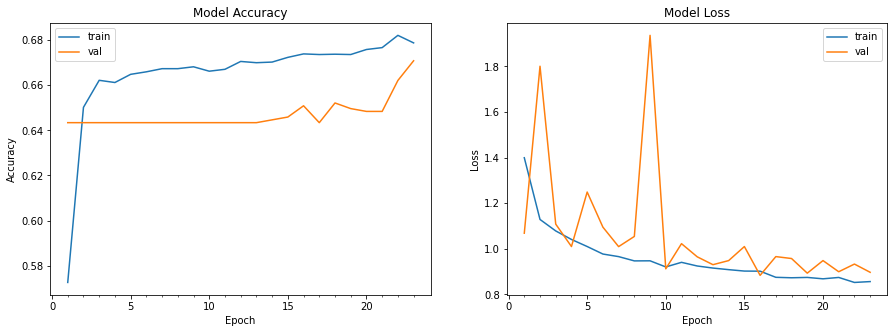

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.pyplot.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.pyplot.show()


plot_model_history(training_history)

In [ ]:
# Test the model with X_Test and y_Test
#Use a confusion matrix to see the number of incorrect predictions 

y_predicted = model.predict(X_test)
predicted_classes = np.argmax(y_predicted, axis=1)
actual_classes = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(actual_classes, predicted_classes,)
fmatrix = matrix
# fmatrix = matrix.astype('float') / matrix.sum(axis=1)

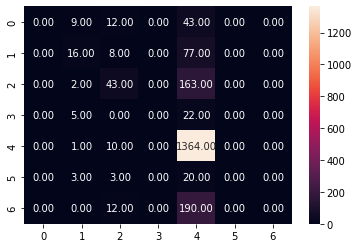

In [ ]:
import seaborn as sns 
sns.heatmap(fmatrix, annot=True, fmt='.2f')